In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import requests

In [14]:
# Load the data
data = pd.read_csv('home_price_data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Select features and target variable
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = data[features]
y = data['SalePrice']

In [ ]:
# Split data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [28]:
# Specify the model
main_model = DecisionTreeRegressor(random_state=1)

# Fit main model with the training data.
main_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [30]:
# Predict with all validation observations
val_predictions = main_model.predict(val_X)
# print the top few validation predictions
print('val_pred:', val_predictions)
# print the top few actual prices from validation data
print('Actual Val_y:', val_y)

val_pred: [186500. 184000. 130000.  92000. 164500. 220000. 335000. 144152. 215000.
 262000. 180000. 121000. 175900. 210000. 248900. 131000. 100000. 149350.
 235000. 156000. 149900. 265979. 193500. 377500. 100000. 162900. 145000.
 180000. 582933. 146000. 140000.  91500. 112500. 113000. 145000. 312500.
 110000. 132000. 305000. 128000. 162900. 115000. 110000. 124000. 215200.
 180000.  79000. 192000. 282922. 235000. 132000. 325000.  80000. 237000.
 208300. 100000. 120500. 162000. 153000. 187000. 185750. 335000. 129000.
 124900. 185750. 133700. 127000. 230000. 146800. 157900. 136000. 153575.
 335000. 177500. 143000. 202500. 168500. 105000. 305900. 192000. 190000.
 140200. 134900. 128950. 213000. 108959. 149500. 190000. 175900. 160000.
 250580. 157000. 120500. 147500. 118000. 117000. 110000. 130000. 148500.
 148000. 190000. 130500. 127000. 120500. 135000. 168000. 176432. 128000.
 147000. 260000. 132000. 129500. 171000. 181134. 227875. 189000. 282922.
  94750. 185000. 194000. 159000. 279500. 

In [32]:
#Calculate the Mean Absolute Error in Validation Data, mae = maximum absolute error
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

29652.931506849316


R-squared: 0.7399665322271229


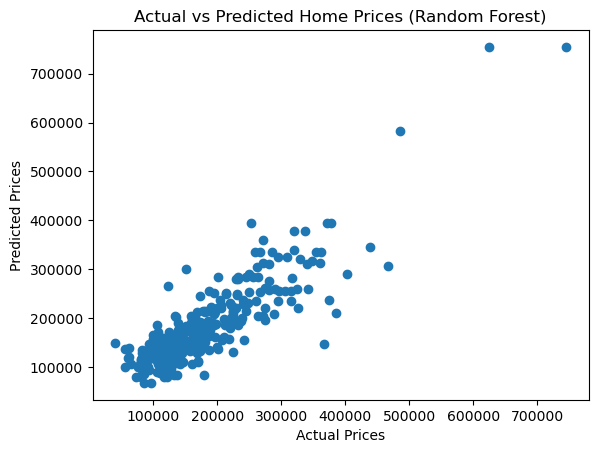

In [82]:
# Evaluate the model
#mse = mean_squared_error(val_y, val_predictions)
r2 = r2_score(val_y, val_predictions)
#print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predictions
plt.scatter(val_y, val_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices (Random Forest)')
plt.show()

In [84]:
#Optimize the size of the tree to make better predictions.
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val) 
    #mae = mean_squared_error(val_y, preds_val)
    return(mae)

In [86]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# loop to find the ideal tree size from candidate_max_leaf_nodes
my_mae = {max_leaf_nodes: get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)for max_leaf_nodes in candidate_max_leaf_nodes}
    
# Storing the best value of max_leaf_nodes
best_tree_size = min(my_mae, key=my_mae.get)
print (best_tree_size)

100


In [88]:
#Fit Model Using All Data
# Fittng the tree optimal size
final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
#mae = mean_absolute_error(val_y, preds_val)
final_model.fit(X,y)
preds_val = final_model.predict(val_X)
print(preds_val)

[182392.31944444 163142.5        125362.57333333  70167.58333333
 146415.0075188  332156.         270325.         159006.60714286
 228735.80645161 268500.         171330.48780488 109817.75213675
 194555.71428571 354000.         259866.66666667 109817.75213675
 125362.57333333 146415.0075188  247500.         125362.57333333
 143008.69565217 130811.11111111 209123.07692308 304123.28571429
  87128.33333333 163142.5        121022.47368421 190290.7125
 454316.66666667 121022.47368421 143297.46666667  94311.11111111
 125362.57333333 118655.         130629.         362746.75
 109817.75213675 109817.75213675 268988.66666667 121022.47368421
 130629.         130629.          94311.11111111 109817.75213675
 182392.31944444 171330.48780488  87128.33333333 190290.7125
 238169.3255814  268428.33333333 109817.75213675 301750.
 118655.         238460.47368421 190290.7125      94311.11111111
 125362.57333333 182392.31944444 130629.         182392.31944444
 171330.48780488 270325.         109817.7521367

R-squared: 0.929824402621214


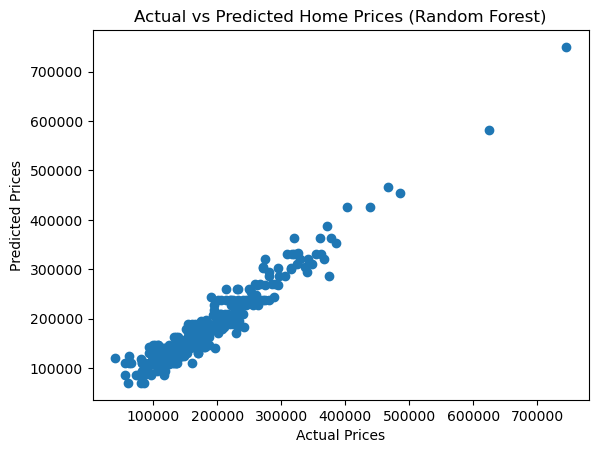

In [90]:
# Evaluate the model
#mse = mean_squared_error(val_y, preds_val)
r2 = r2_score(val_y, preds_val)
#print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predictions
plt.scatter(val_y, preds_val)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices (Random Forest)')
plt.show()